

<h1 style="color: #49BFCF; font-family: serif;text-align: center"><strong>Creation de données fictives avec Python
</strong></h1>

<h1 style="color: #49BFCF; font-family: serif;">Sommaire</h1>

*   1.Contexte
*   2.Description fonctionnelle
*   3.Les étapes de modifications des données
*   4.Les méthodes et technologies utilisées
*   5.Jupyter Notebook

    *   5.1 Onglet Customers

        * Importation des librairies python
        * Lecture du jeu de données
        * Exploration du jeux de données
        * Informations sur les valeurs nulles
        * Création des données fictives
        * Fusion des données
        * Enregistrement format csv et excel

            
                
    *   5.2 Onglet orders
        
        * Lecture du jeu de données
        * Exploration du jeux de données
        * Informations sur les valeurs nulles
        * Renommer les colonnes
        * Création des données fictives
        * Création des colonnes: 
            *   selling price
            *   total amount
            *   delivery_date
            *   processing_date   
        * Changer l'ordre des colonnes
        * Fusion des données
        * Enregistrement format csv et excel

<h1 style="color: #49BFCF;font-size:35px; font-family: serif;"><strong>1.Contexte
</strong></h1>

Dans ce NoteBook Jupyter, nous aborderons la première étape d'un projet Django: la création de données fictives à partir d'un fichier excel existant.

**Etapes du projet django:**

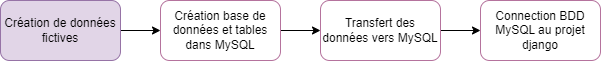

In [1]:
from IPython.display import Image
Image("projet.drawio.png")

**Le fichier Excel:**


Contient 6 onglets correspondant aux ventes et commandes d'une compagny US.

J'ai choisi ce fichier car les différentes onglets ont des relations entre eux. Lors de la creation des tables dans notre base de données MySQL, nous utiliserons des foreign key afin d'y faire référence. 

[Lien vers le fichir excel]( https://docs.google.com/spreadsheets/d/1MJtHYN_gbFfFUBPX5la8-eNVEoe2ELPU/edit?usp=share_link&ouid=101522886780023023970&rtpof=true&sd=true)

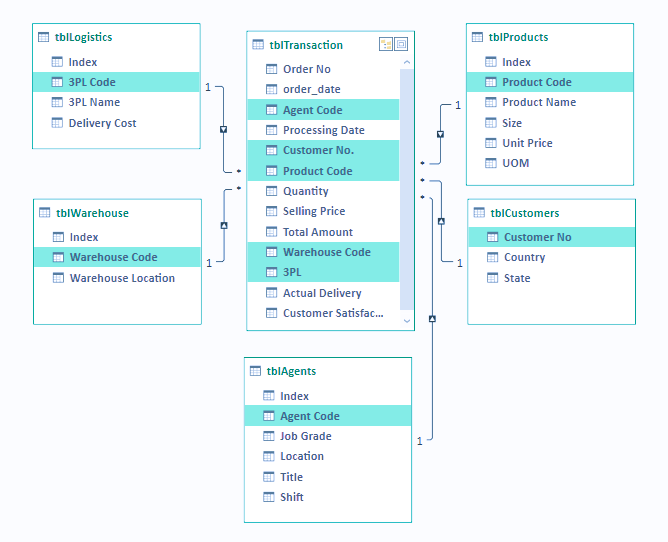

In [2]:
from IPython.display import Image
Image("base.png")

<h1 style="color: #49BFCF;font-size:35px; font-family: serif;"><strong>2.Description fonctionnelle</strong></h1>

Nous allons modifier deux onglets de celui ci.

 <h1 style="color: #49BFCF;font-size:24px; font-family: serif;">Onglet Customer</h1>

3 colonnes existantes:

*   Customer No
*   State
*   Country

<strong>Résulats attendus:</strong> pour chaque ligne existantes(clients), je souhaite ajouter des informations supplémentaires:

*   Nom de famille
*   Prénom
*   Adresse
*   Numéro de téléphone
*   email
*   Date de naissance(âge entre 18 et 90 ans)

 <h1 style="color: #49BFCF;font-size:24px; font-family: serif;">Onglet Orders</h1>


L'onglet Orders contient 13 colonnes:

*  Order No
* order_date
* Agent Code
* Processing Date
* Customer No
* Product Code
* Quantity
* Selling Price
* Total Amount
* Warehouse Code
*   3PL 
*   Actual Delivery
*   Customer Satisfaction

**Résulats attendus:** les dates de commandes s'arretent fin 2020. Je souhaite créer des commandes entre 2021 et mars 2023, en utilisant les données présentes dans les colonnes existantes.

Chaque nouvelle ligne aura un id différent, composé de chiffres et de lettres et sera incrémentée automatiquement.

Exemple:

*   OR-481-132578
*   OR-481-132579
*   OR-481-132580



<h1 style="color: #49BFCF;font-size:30px; font-family: serif;"><strong>3.Les étapes de modifications des données
</strong></h1>

* Importer les données excel dans un DataFrame
* Générer les données fictives avec Faker
* Fusionner les nouvelles données avec celles du fichier de base.
* Enregistrer au format xlsx et csv


<h1 style="color: #49BFCF;font-size:30px; font-family: serif;"><strong>4.Les méthodes et technologies utilisées
</strong></h1>

**bibliothèque python:**

*   Faker: est un package qui génère de fausses données.
*   Pandas
*   Numpy
*   Random: génére des nombres et des données aléatoires


**Afin de générer des ID auto incrementé**, j'ai crée une fonction et utilisé une valeur **globale**
Les variables globales se déclarent en Python comme une variable locale mais à l'extérieur d'une fonction.Pour utiliser une variable globale sans modifier sa valeur, il suffit de l'appeler dans une fonction comme vous le feriez avec une variable locale. Si la fonction doit modifier la valeur de la variable, alors il faut la redéclarer en la précédant du mot-clé global.


<h1 style="color: #49BFCF;font-size:35px; font-family: serif;"><strong>5.Jupyter Notebook
</strong></h1>
<h1 style="color: #49BFCF;font-size:30px; font-family: serif;"><strong>5.1 Onglet Customers
</strong></h1>

<h1 style="color: #49BFCF;font-size:28px; font-family: serif;">Importation des librairies python</h1>


In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import random
from datetime import datetime
from faker import Faker
from faker.providers import BaseProvider

<h1 style="color: #49BFCF;font-size:30px; font-family: serif;">Lecture du jeu de données</h1>

In [3]:
import pandas as pd
df_excel=pd.read_excel(open('compagny_data.xlsx', 'rb'),
              sheet_name='CUSTOMER')  


<h1 style="color: #49BFCF;font-size:30px; font-family: serif;">Exploration du jeux de données</h1>
Les 5 premières lignes



In [4]:
 
df_excel.head()

,Customer No,Country,State
0,CU-001-1248,USA,Alaska
1,CU-001-1249,USA,Hawaii
2,CU-001-1250,USA,Maryland
3,CU-001-1251,USA,Rhode Island
4,CU-001-1252,USA,Florida



<h1 style="color: #49BFCF;font-size:30px; font-family: serif;">Forme des données : 
</h1>
Nombres de lignes et colonnes

In [5]:
import numpy as np
df_excel.shape
print('Il y a', np.shape(df_excel)[0], 'lignes et', np.shape(df_excel)[1],'colonnes')

Il y a 1765 lignes et 3 colonnes



<h1 style="color: #49BFCF;font-size:30px; font-family: serif;">Informations sur le jeu de données
</h1>
Info affiche le tableau contenant les noms de colonne, le nombre de valeurs non nulles et les types de données.

In [6]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer No  1765 non-null   object
 1   Country      1765 non-null   object
 2   State        1765 non-null   object
dtypes: object(3)
memory usage: 41.5+ KB




<h1 style="color: #49BFCF;font-size:30px; font-family: serif;">Informations sur les valeurs nulles</h1>

Nous allons ensuite vérifier si notre jeu de données contient des valeurs manquantes :

In [7]:
df_excel.isnull().sum()

Customer No    0
Country        0
State          0
dtype: int64

Aucune valeur manquante dans le dataFrame.

<h1 style="color: #49BFCF;font-size:30px; font-family: serif;">Création des données fictives</h1>

Stockage dans une variable du nombre de customer

In [8]:
len = df_excel['Customer No'].count()
print(len)

1765


Creation d'une classe qui hérite du BaseProvider.

In [9]:
import pandas as pd
import random
from datetime import datetime
from faker import Faker
from faker.providers import BaseProvider

fake = Faker()

# This custom Provider inherits from the BaseProvider
class Provider(BaseProvider):

    def firstName(self):
        return fake.first_name()

    def lastName(self):
        return fake.last_name()

    def address(self):       
        return fake.street_address()

    def phone(self):         
        return fake.phone_number()    
          
    def mail(self):                       
        return fake.email()

    def birhtdate(self):
      return fake.date_of_birth(minimum_age=18, maximum_age=90) 

# Add the Provider to our faker object
fake.add_provider(Provider)

def create_fake_data(fake, no_of_rows):

    columns = ['firstName', 'lastName', 'address', 'phone', 'mail','birhtdate' ]
    data = {column: [getattr(fake, column)() for _ in range(no_of_rows)] for column in columns}
    df = pd.DataFrame(data=data)
    df = df[columns]

    return df

df = create_fake_data(fake, int(len) ) #Create the same number of rows
df

,firstName,lastName,address,phone,mail,birhtdate
0,James,Wright,417 Monroe Throughway Apt. 398,001-329-578-0869x8359,zachary04@example.net,1961-08-31
1,Christopher,Scott,791 Nelson Mount Apt. 213,390.528.2460x90579,anthonythomas@example.net,1960-02-12
2,Jeffrey,Bennett,0528 Kelley Vista,(951)186-3312x37714,sarahcardenas@example.com,1965-10-02
3,Brandi,Marshall,5541 Medina Landing,(614)360-5611x13189,joelwilliams@example.net,1936-05-29
4,Thomas,Jenkins,93042 Smith Ferry Suite 387,836.736.3497,erice@example.org,1934-04-09
...,...,...,...,...,...,...
1760,Michael,Rosario,338 Payne Dale,767-616-8044x4950,melindawilliams@example.org,1936-10-06
1761,Gary,Farrell,496 Nicholas Springs,(667)897-3388x175,samanthakane@example.com,1989-04-26
1762,Gabriel,Anderson,124 Cook Fort Apt. 133,8203610089,johnwhite@example.net,1952-03-12
1763,Shelby,Hicks,068 Andrea Glens Suite 901,130.424.0736,prattcharles@example.net,1942-06-20


<h1 style="color: #49BFCF;font-size:30px; font-family: serif;">Fusion des données</h1>


In [10]:
df = pd.concat([df_excel,df], axis=1)
df

,Customer No,Country,State,firstName,lastName,address,phone,mail,birhtdate
0,CU-001-1248,USA,Alaska,James,Wright,417 Monroe Throughway Apt. 398,001-329-578-0869x8359,zachary04@example.net,1961-08-31
1,CU-001-1249,USA,Hawaii,Christopher,Scott,791 Nelson Mount Apt. 213,390.528.2460x90579,anthonythomas@example.net,1960-02-12
2,CU-001-1250,USA,Maryland,Jeffrey,Bennett,0528 Kelley Vista,(951)186-3312x37714,sarahcardenas@example.com,1965-10-02
3,CU-001-1251,USA,Rhode Island,Brandi,Marshall,5541 Medina Landing,(614)360-5611x13189,joelwilliams@example.net,1936-05-29
4,CU-001-1252,USA,Florida,Thomas,Jenkins,93042 Smith Ferry Suite 387,836.736.3497,erice@example.org,1934-04-09
...,...,...,...,...,...,...,...,...,...
1760,CU-001-3008,USA,Oregon,Michael,Rosario,338 Payne Dale,767-616-8044x4950,melindawilliams@example.org,1936-10-06
1761,CU-001-3009,USA,North Dakota,Gary,Farrell,496 Nicholas Springs,(667)897-3388x175,samanthakane@example.com,1989-04-26
1762,CU-001-3010,USA,Arkansas,Gabriel,Anderson,124 Cook Fort Apt. 133,8203610089,johnwhite@example.net,1952-03-12
1763,CU-001-3011,USA,Alabama,Shelby,Hicks,068 Andrea Glens Suite 901,130.424.0736,prattcharles@example.net,1942-06-20


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer No  1765 non-null   object
 1   Country      1765 non-null   object
 2   State        1765 non-null   object
 3   firstName    1765 non-null   object
 4   lastName     1765 non-null   object
 5   address      1765 non-null   object
 6   phone        1765 non-null   object
 7   mail         1765 non-null   object
 8   birhtdate    1765 non-null   object
dtypes: object(9)
memory usage: 124.2+ KB


Convertion de la colonne 'birthdate'au format datetime

In [13]:
df['birhtdate'] =  pd.to_datetime(df['birhtdate'], format='%Y-%M-%d')

In [14]:
df['birhtdate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1765 entries, 0 to 1764
Series name: birhtdate
Non-Null Count  Dtype         
--------------  -----         
1765 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 13.9 KB


<h1 style="color: #49BFCF;font-size:30px; font-family: serif;">Enregistrement au format excel dans le fichier existant 'compagny_data.xlsx'</h1>

In [ ]:
with pd.ExcelWriter('compagny_data.xlsx',
                  mode='a') as writer:

      df.to_excel(writer, sheet_name='customer_faker', index=False)

<h1 style="color: #49BFCF;font-size:30px; font-family: serif;">Enregistrement format csv</h1>

In [ ]:
df.to_csv('customer_faker.csv')



<h1 style="color: #49BFCF;font-size:32px; font-family: serif;"><strong>5.2 Onglet orders
</strong></h1>

<h1 style="color: #49BFCF;font-size:30px; font-family: serif;">Lecture du jeu de données</h1>
Nous importons d’abord le fichier Excel en tant que Dataframe avec le code suivant :

In [50]:
import pandas as pd
df_excel_2=pd.read_excel(open('compagny_data.xlsx', 'rb'),
              sheet_name='ORDERS')  


Exploration rapide
Head

In [51]:
df_excel_2.head()

,Order No,order_date,Agent Code,Processing Date,Customer No.,Product Code,Quantity,Selling Price,Total Amount,Warehouse Code,3PL,Actual Delivery,Customer Satisfaction
0,OR-481-389,2020-02-16,AG-003,2020-02-17,CU-001-1865,PR-143-1167,2,1038,2076,WH-004,3PL-003,2020-02-29,3
1,OR-481-390,2020-09-16,AG-004,2020-09-18,CU-001-1290,PR-143-1153,3,1084,3252,WH-001,3PL-001,2020-10-01,5
2,OR-481-391,2020-11-18,AG-001,2020-11-22,CU-001-2274,PR-143-1178,2,1090,2180,WH-001,3PL-003,2020-12-02,5
3,OR-481-392,2020-05-12,AG-026,2020-05-18,CU-001-2436,PR-143-1102,1,1038,1038,WH-004,3PL-001,2020-05-27,3
4,OR-481-393,2020-07-26,AG-011,2020-07-31,CU-001-2589,PR-143-1168,4,1079,4316,WH-001,3PL-002,2020-08-12,3



<h1 style="color: #49BFCF;font-size:30px; font-family: serif;">Forme des données : 
</h1>
Nombres de lignes et colonnes

In [52]:
import numpy as np
df_excel_2.shape
print('Il y a', np.shape(df_excel_2)[0], 'lignes et', np.shape(df_excel_2)[1],'colonnes')

Il y a 132188 lignes et 13 colonnes



<h1 style="color: #49BFCF;font-size:30px; font-family: serif;">Informations sur le jeu de données
</h1>
Info affiche le tableau contenant les noms de colonne, le nombre de valeurs non nulles et les types de données.

In [53]:
df_excel_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132188 entries, 0 to 132187
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Order No               132188 non-null  object        
 1   order_date             132188 non-null  datetime64[ns]
 2   Agent Code             132188 non-null  object        
 3   Processing Date        132188 non-null  datetime64[ns]
 4   Customer No.           132188 non-null  object        
 5   Product Code           132188 non-null  object        
 6   Quantity               132188 non-null  int64         
 7   Selling Price          132188 non-null  int64         
 8   Total Amount           132188 non-null  int64         
 9   Warehouse Code         132188 non-null  object        
 10  3PL                    132188 non-null  object        
 11  Actual Delivery        132188 non-null  datetime64[ns]
 12  Customer Satisfaction  132188 non-null  int6



<h1 style="color: #49BFCF;font-size:30px; font-family: serif;">Informations sur les valeurs nulles</h1>

Nous allons ensuite vérifier si notre jeu de données contient des valeurs manquantes :

In [21]:
df_excel_2.isnull().sum()

Order No                 0
order_date               0
Agent Code               0
Processing Date          0
Customer No.             0
Product Code             0
Quantity                 0
Selling Price            0
Total Amount             0
Warehouse Code           0
3PL                      0
Actual Delivery          0
Customer Satisfaction    0
dtype: int64

<h1 style="color: #49BFCF;font-size:30px; font-family: serif;">Modification des données</h1>

**Renommer les colonnes**

In [54]:
df_excel_2.columns

Index(['Order No', 'order_date', 'Agent Code', 'Processing Date',
       'Customer No.', 'Product Code', 'Quantity', 'Selling Price',
       'Total Amount', 'Warehouse Code', '3PL', 'Actual Delivery',
       'Customer Satisfaction'],
      dtype='object')

**En tête des colonnes en minuscule et espace remplacer par underscosr**

In [55]:
df_excel_2.columns = [x.lower().replace(' ', '_') for x in df_excel_2.columns]

In [59]:
df_excel_2=df_excel_2.rename(columns={ 'customer_no.':'customer_no',
                                      '3pl':'delivery_cost'
                                 
                                    })


In [60]:
df_excel_2.columns

Index(['order_no', 'order_date', 'agent_code', 'processing_date',
       'customer_no', 'product_code', 'quantity', 'selling_price',
       'total_amount', 'warehouse_code', 'delivery_cost', 'actual_delivery',
       'customer_satisfaction'],
      dtype='object')

<h1 style="color: #49BFCF;font-size:30px; font-family: serif;">Création des données fictives</h1>

Dans le code suivant, on récupère les données unique présentes dans la colonne "customer_code"

In [43]:
print(df_excel_2["customer_no"].unique())

['CU-001-1865' 'CU-001-1290' 'CU-001-2274' ... 'CU-001-2995' 'CU-001-1654'
 'CU-001-2546']


**Incrementation primary key avec letters et nombres**

Incrementation commence à partir du dernier order_id
 

In [29]:
print(df_excel_2["order_no"].iloc[-1])
order_no=df_excel_2["order_no"].iloc[-1]

OR-481-132576


On converti une chaine de caractère en nombre entier

In [45]:
int(order_no[7:])


132576

In [46]:
order_no[:7]

'OR-481-'

La fonction suivante permet de générer de nouveau identifiant. 

La variable num correspond au chiffre contenu dans le dernier id de la colonne order_code. order_no[7:].

In [47]:
num = int(order_no[7:])
def number():
    global num
    num += 1
    return ('OR-481-'+ str(num))
for i in range(10):
  print(number())

OR-481-132577
OR-481-132578
OR-481-132579
OR-481-132580
OR-481-132581
OR-481-132582
OR-481-132583
OR-481-132584
OR-481-132585
OR-481-132586


**Creation de 400 000 nouvellles lignes de commandes entre le 01/01/2021 et 01/03/2023**

In [61]:
import pandas as pd
import random
from datetime import datetime
from faker import Faker
from faker.providers import BaseProvider

fake = Faker()

# This custom Provider inherits from the BaseProvider
class Provider(BaseProvider):

    start_date = datetime(2021, 1, 1)
    end_date = datetime(2023, 3, 1)    
    agent = df_excel_2["agent_code"].unique()   
    
    warehouse = df_excel_2["warehouse_code"].unique()   
    
    num =  int(order_no[7:])
    p_code=df_excel_2['product_code'].unique()
    c_code=df_excel_2["customer_no"].unique()
    cost=df_excel_2["delivery_cost"].unique()
  


    def order_no(self):
      global num
      num += 1
      return (order_no[:7]+ str(num))

    def order_date(self):        
        """Return random date between the start and end dates."""        

        self.order_date = fake.date_between_dates(
            date_start=self.start_date, date_end=self.end_date).strftime('%Y-%m-%d')

        return self.order_date

   

    def agent_code(self):
        """Return a random agent from colomn 'agent_code"""        

        return random.choice(self.agent)

    def product_code(self):
        """Return a random product code from column 'product_code' """        

        return random.choice(self.p_code)

    def customer_no(self):
        """Return a random customer code from column 'customer_code' """        

        return random.choice(self.c_code)

    def quantity(self):
    
        return random.randint(1, 10)

    def warehouse_code(self):
        """Return a random warehousecode from column 'warehouse_code' """        

        return random.choice(self.warehouse)

    def delivery_cost(self):      

        return random.choice(self.cost)

    def customer_satisfaction(self):      

        return random.randint(1, 5)        

    

    

# Add the Provider to our faker object
fake.add_provider(Provider)

def create_fake_data(fake, no_of_rows):

    columns = [ 'order_no','order_date','agent_code', 'product_code','customer_no','quantity', 'warehouse_code','delivery_cost', 'customer_satisfaction' ]
    data = {column: [getattr(fake, column)() for _ in range(no_of_rows)] for column in columns}
    df_order = pd.DataFrame(data=data)
    df_order = df_order[columns]

    return df_order

df_order = create_fake_data(fake,400000 )
df_order.head()


,order_no,order_date,agent_code,product_code,customer_no,quantity,warehouse_code,delivery_cost,customer_satisfaction
0,OR-481-132587,2021-12-14,AG-021,PR-143-1205,CU-001-2144,7,WH-002,3PL-004,1
1,OR-481-132588,2021-03-28,AG-011,PR-143-1110,CU-001-2202,10,WH-002,3PL-003,5
2,OR-481-132589,2022-12-28,AG-001,PR-143-1205,CU-001-2092,5,WH-003,3PL-001,3
3,OR-481-132590,2021-06-27,AG-019,PR-143-1175,CU-001-1277,5,WH-004,3PL-004,2
4,OR-481-132591,2021-09-06,AG-026,PR-143-1083,CU-001-2262,6,WH-004,3PL-004,2


In [73]:
df_order.shape

(400000, 9)

<h1 style="color: #49BFCF;font-size:30px; font-family: serif;">Création des colonnes:  </h1>

*   selling price
*   total amount
*   delivery_date
*   processing_date









<h1 style="color: #49BFCF;font-size:30px; font-family: serif;">Colonne selling_price</h1>
Merge des dataframes afin de récupérer les prix de ventes
Pour chaque 'Produit Code', je veux obtenir le prix correspondant. 

Stockage dans un dataframe des deux colonnes correspondantes.

In [ ]:
df_new = df_excel_2[['product_code', 'selling_price']]
#df_new=df_new.drop_duplicates(subset=['product_code'])
df_new

,product_code,selling_price
0,PR-143-1167,1038
1,PR-143-1153,1084
2,PR-143-1178,1090
3,PR-143-1102,1038
4,PR-143-1168,1079
...,...,...
132183,PR-143-1159,1136
132184,PR-143-1176,976
132185,PR-143-1121,1099
132186,PR-143-1161,1236


**Merge left**

In [ ]:
import pandas as pd
df_order = pd.merge(df_order,df_new[['product_code','selling_price']],on='product_code', how='left')

<h1 style="color: #49BFCF;font-size:30px; font-family: serif;">total_Amount</h1>
Merge des dataframes afin de récupérer les prix de ventes

On multiplie la colonne "quantité" par la colonne "selling_price".


In [ ]:
df_order['total_amount'] = df_order['quantity']* df_order['selling_price']
df_order.head()


,order_no,order_date,agent_code,product_code,customer_code,quantity,warehouse_code,pl3,customer_satisfaction,selling_price,total_amount
0,OR-481-532587,2023-01-05,AG-015,PR-143-1172,CU-001-1999,9,WH-001,3PL-001,4,1062,9558
1,OR-481-532588,2022-12-11,AG-028,PR-143-1112,CU-001-2973,6,WH-002,3PL-001,2,979,5874
2,OR-481-532589,2021-06-29,AG-015,PR-143-1142,CU-001-1662,2,WH-004,3PL-002,1,1230,2460
3,OR-481-532590,2021-03-07,AG-007,PR-143-1125,CU-001-2194,4,WH-001,3PL-004,5,976,3904
4,OR-481-532591,2021-11-22,AG-010,PR-143-1175,CU-001-2855,7,WH-003,3PL-004,1,1206,8442


<h1 style="color: #49BFCF;font-size:30px; font-family: serif;">delivery_date</h1>

<h1 style="color: #49BFCF;font-size:30px; font-family: serif;">processing_date</h1>

Afin de créer ces colonnes, je souhaite connaitre la durée en jours entre dans notre fichier de base df_excel

*   La date de commande et la date de livraison
*   La date de commade et la date de traitement



In [ ]:
df2= df_excel_2.copy()


Définir le delais entre date de commande et date de livraison


In [ ]:
df2['delta1'] = df2['delivery_date']- df2['order_date']
df2['delta1'].describe()

count                        132188
mean     16 days 11:44:46.246860532
std       3 days 12:05:06.808814283
min                 9 days 00:00:00
25%                14 days 00:00:00
50%                16 days 00:00:00
75%                19 days 00:00:00
max                24 days 00:00:00
Name: delta1, dtype: object

La describe()méthode renvoie la description des données dans le DataFrame.

calcul du delta entre date order et processing date

In [ ]:
df2['delta2'] = df2['processing_date']- df2['order_date']
df2['delta2'].describe()

count                       132188
mean     5 days 11:53:48.093321632
std      2 days 20:56:12.137954503
min                1 days 00:00:00
25%                3 days 00:00:00
50%                5 days 00:00:00
75%                8 days 00:00:00
max               10 days 00:00:00
Name: delta2, dtype: object

In [ ]:
import time
from datetime import datetime, timedelta, date, time

# colonne 'delivery_date'

df_order['delivery_date'] = (pd.to_datetime(df_order['order_date']) + timedelta(random.randint(9,24)))

# colonne 'processing_date'
df_order['processing_date'] = (pd.to_datetime(df_order['order_date']) + timedelta(random.randint(1,10)))
df_order.head()

,order_no,order_date,agent_code,product_code,customer_code,quantity,warehouse_code,pl3,customer_satisfaction,selling_price,total_amount,delivery_date,processing_date
0,OR-481-532587,2023-01-05,AG-015,PR-143-1172,CU-001-1999,9,WH-001,3PL-001,4,1062,9558,2023-01-28,2023-01-09
1,OR-481-532588,2022-12-11,AG-028,PR-143-1112,CU-001-2973,6,WH-002,3PL-001,2,979,5874,2023-01-03,2022-12-15
2,OR-481-532589,2021-06-29,AG-015,PR-143-1142,CU-001-1662,2,WH-004,3PL-002,1,1230,2460,2021-07-22,2021-07-03
3,OR-481-532590,2021-03-07,AG-007,PR-143-1125,CU-001-2194,4,WH-001,3PL-004,5,976,3904,2021-03-30,2021-03-11
4,OR-481-532591,2021-11-22,AG-010,PR-143-1175,CU-001-2855,7,WH-003,3PL-004,1,1206,8442,2021-12-15,2021-11-26


In [ ]:
df_order.dtypes

order_no                         object
order_date                       object
agent_code                       object
product_code                     object
customer_code                    object
quantity                          int64
warehouse_code                   object
pl3                              object
customer_satisfaction             int64
selling_price                     int64
total_amount                      int64
delivery_date            datetime64[ns]
processing_date          datetime64[ns]
dtype: object

In [ ]:
df_order['order_date'] = df_order['order_date'].astype('datetime64')



<h1 style="color: #49BFCF;font-size:30px; font-family: serif;">Changer l'ordre des colonnes</h1>

Using loc method

In [ ]:
df_order.columns

Index(['order_no', 'order_date', 'agent_code', 'product_code', 'customer_code',
       'quantity', 'warehouse_code', 'pl3', 'customer_satisfaction',
       'selling_price', 'total_amount', 'delivery_date', 'processing_date'],
      dtype='object')

In [ ]:
df1=df_order.loc[:,['order_no', 'order_date', 'processing_date','agent_code', 'customer_code','product_code', 
       'quantity', 'selling_price','total_amount' ,'warehouse_code', 'pl3'
       , 'delivery_date', 'customer_satisfaction'
       ]]
df_order.head()

,order_no,order_date,agent_code,product_code,customer_code,quantity,warehouse_code,pl3,customer_satisfaction,selling_price,total_amount,delivery_date,processing_date
0,OR-481-532587,2023-01-05,AG-015,PR-143-1172,CU-001-1999,9,WH-001,3PL-001,4,1062,9558,2023-01-28,2023-01-09
1,OR-481-532588,2022-12-11,AG-028,PR-143-1112,CU-001-2973,6,WH-002,3PL-001,2,979,5874,2023-01-03,2022-12-15
2,OR-481-532589,2021-06-29,AG-015,PR-143-1142,CU-001-1662,2,WH-004,3PL-002,1,1230,2460,2021-07-22,2021-07-03
3,OR-481-532590,2021-03-07,AG-007,PR-143-1125,CU-001-2194,4,WH-001,3PL-004,5,976,3904,2021-03-30,2021-03-11
4,OR-481-532591,2021-11-22,AG-010,PR-143-1175,CU-001-2855,7,WH-003,3PL-004,1,1206,8442,2021-12-15,2021-11-26


<h1 style="color: #49BFCF;font-size:30px; font-family: serif;">joindre les dataframe</h1>


In [ ]:
df_order = pd.concat([df_excel,df_order], axis=0)

In [ ]:
df_order.shape

(532188, 13)

<h1 style="color: #49BFCF;font-size:30px; font-family: serif;">Enregistrement dans fichier excel existant sans les index</h1>


In [ ]:
with pd.ExcelWriter('compagny_data.xlsx',
                  mode='a') as writer:

      df_order.to_excel(writer, sheet_name='order_faker', index=False)

<h1 style="color: #49BFCF;font-size:30px; font-family: serif;">Enregistrement au format csv</h1>

In [ ]:
df_order.to_csv('order_faker.csv')